In [1]:
import pandas as pd
import os

In [2]:
df=pd.read_pickle("calibration_grade_info.pkl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 352 to 31343
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Observation ID      1378 non-null   int64  
 1   Overall Grade       1378 non-null   float64
 2   Flagged Percentage  1378 non-null   float64
 3   Data Set ID         1378 non-null   object 
 4   Scan ID             1378 non-null   object 
 5   Right Ascension     1378 non-null   float64
 6   Declination         1378 non-null   float64
 7   Start Time          1378 non-null   float64
 8   End Time            1378 non-null   float64
 9   Start Time (Unix)   1378 non-null   float64
 10  End Time (Unix)     1378 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 129.2+ KB


<AxesSubplot:ylabel='Frequency'>

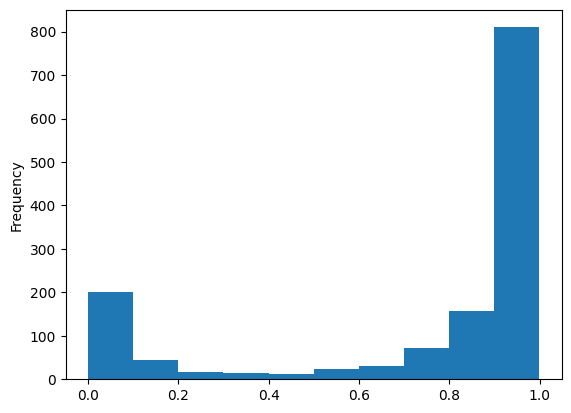

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#df = pd.read_json('hits_collation.json')
#df.plot(kind = 'hist', x = 'signal_driftRate')
df["Overall Grade"].plot(kind = 'hist')

#plt.xlim(-10,10)

<AxesSubplot:ylabel='Frequency'>

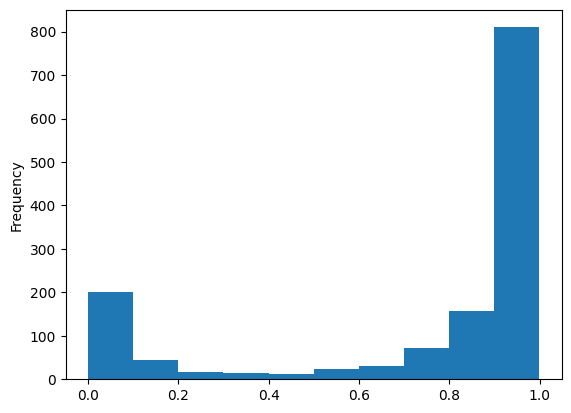

In [7]:
df["Overall Grade"].plot(kind = 'hist')
#df["signal_snr"].plot(kind = 'hist')
#plt.xlim(60098.5,60101)

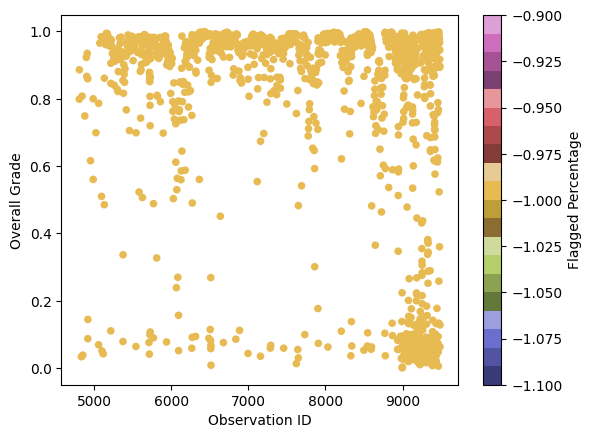

In [9]:
df.plot(kind = 'scatter', x = 'Observation ID', y='Overall Grade', c='Flagged Percentage',cmap="tab20b",)
plt.savefig('sig_freq_beam.png', dpi=600)

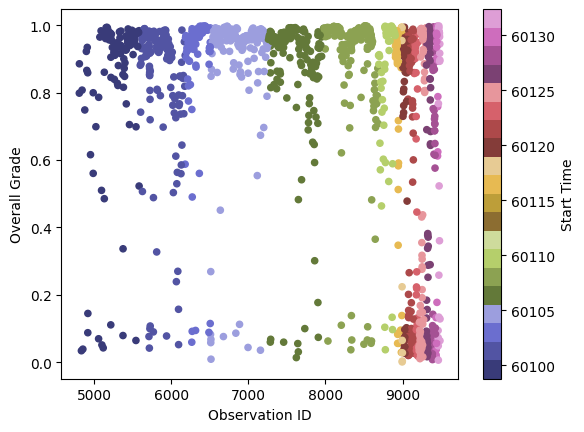

In [10]:
df.plot(kind = 'scatter', x = 'Observation ID', y='Overall Grade', c='Start Time',cmap="tab20b",)
plt.savefig('sig_freq_beam.png', dpi=600)

In [11]:
mo = df["Flagged Percentage"].mode()
print(mo)

0   -1.0
Name: Flagged Percentage, dtype: float64


In [12]:
import seaborn as sns
import numpy as np

In [13]:
sns.set()

In [14]:
df. tail() 

,Observation ID,Overall Grade,Flagged Percentage,Data Set ID,Scan ID,Right Ascension,Declination,Start Time,End Time,Start Time (Unix),End Time (Unix)
31330,9113,0.057467,-1.0,otfg-2023may19.60121.89373118056,otfg-2023may19.60121.89373118056.11.1,190.715352,28.579466,60121.906198,60121.906660,1.687816e+09,1.687816e+09
31335,9114,0.176349,-1.0,otfg-2023may19.60121.89373118056,otfg-2023may19.60121.89373118056.16.1,190.715352,28.579466,60121.908968,60121.909430,1.687816e+09,1.687816e+09
31341,9110,0.150246,-1.0,otfg-2023may19.60121.89373118056,otfg-2023may19.60121.89373118056.3.1,202.784533,30.509155,60121.896502,60121.898580,1.687815e+09,1.687815e+09
31342,9111,0.901687,-1.0,otfg-2023may19.60121.89373118056,otfg-2023may19.60121.89373118056.4.1,202.784533,30.509155,60121.898580,60121.900658,1.687815e+09,1.687815e+09
31343,9112,0.957089,-1.0,otfg-2023may19.60121.89373118056,otfg-2023may19.60121.89373118056.5.1,197.619433,32.345495,60121.900658,60121.904120,1.687815e+09,1.687816e+09


In [15]:
x=df['Start Time']
y = x.astype(float)

In [18]:
df['Start_bin'] = pd.cut(df['Start Time'], np.arange(min(y), max(y), step=150))

In [ ]:
sns.lmplot('x','y', data=df, hue='year_bin')
plt.show()

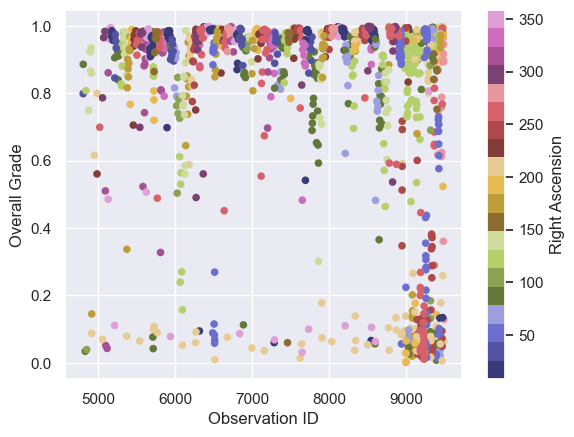

In [20]:
df.plot(kind = 'scatter', x = 'Observation ID', y='Overall Grade', c='Right Ascension',cmap="tab20b",)
plt.savefig('sig_freq_beam.png', dpi=600)

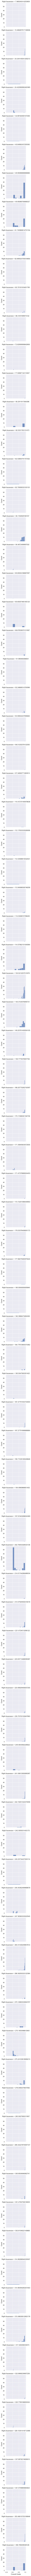

In [22]:
g = sns.FacetGrid(data=df, row="Right Ascension")
g.map(sns.histplot, "Overall Grade")

<AxesSubplot:xlabel='Right Ascension', ylabel='Declination'>

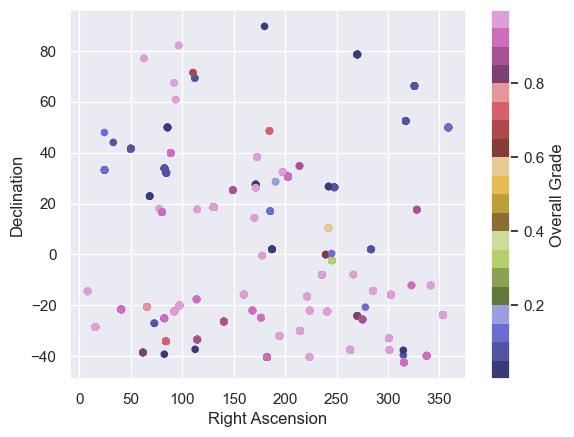

In [25]:
df.plot(kind = 'scatter', x = 'Right Ascension', y='Declination', c='Overall Grade',cmap="tab20b")
#plt.savefig('sig_freq_beam.png', dpi=600)

In [109]:
df['No_of_Obs'] = df.groupby('Right Ascension')['Right Ascension'].transform('count')
print(df)

       Observation ID  Overall Grade  Flagged Percentage  \
352              9283       0.835696                -1.0   
354              9284       0.886077                -1.0   
356              9285       0.861499                -1.0   
358              9286       0.841742                -1.0   
360              9287       0.801014                -1.0   
...               ...            ...                 ...   
31330            9113       0.057467                -1.0   
31335            9114       0.176349                -1.0   
31341            9110       0.150246                -1.0   
31342            9111       0.901687                -1.0   
31343            9112       0.957089                -1.0   

                                           Data Set ID  \
352    14A-000.sb44186743.eb44278494.60125.19863008102   
354    14A-000.sb44186743.eb44278494.60125.19863008102   
356    14A-000.sb44186743.eb44278494.60125.19863008102   
358    14A-000.sb44186743.eb44278494.60125.1986

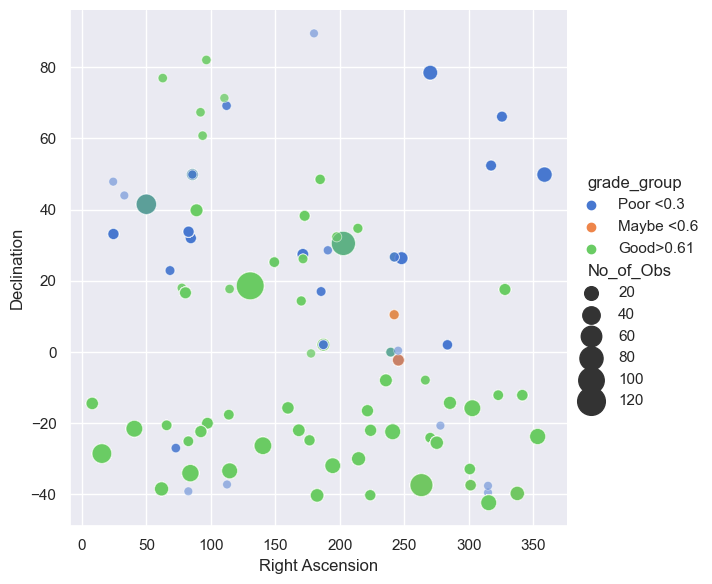

In [110]:
sns.relplot(x="Right Ascension", y="Declination", hue=df['grade_group'], size="No_of_Obs",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.savefig('calibration_bubbles.png', dpi=600)

In [54]:
df['Overall Grade']

352      0.835696
354      0.886077
356      0.861499
358      0.841742
360      0.801014
           ...   
31330    0.057467
31335    0.176349
31341    0.150246
31342    0.901687
31343    0.957089
Name: Overall Grade, Length: 1378, dtype: float64

In [97]:
df['grade_group']=pd.cut(df['Overall Grade'], [0, 0.25, 0.50, 0.75, 1.00], labels=False, retbins=False)

In [98]:
print(df['grade_group'])

352      3
354      3
356      3
358      3
360      3
        ..
31330    0
31335    0
31341    0
31342    3
31343    3
Name: grade_group, Length: 1378, dtype: int64


<AxesSubplot:ylabel='Frequency'>

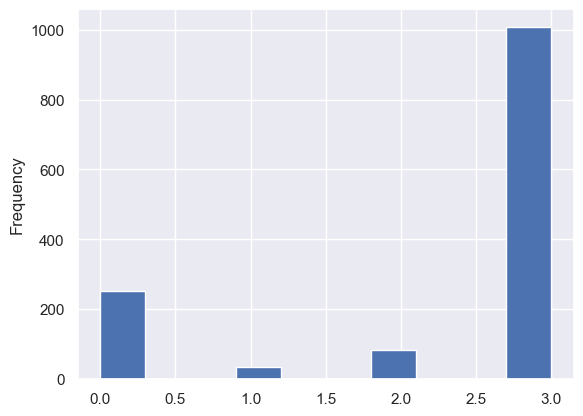

In [99]:
df["grade_group"].plot(kind = 'hist')

In [107]:
# Function: Copy-pasted from question and modified
def get_num_people_by_age_category(df):
    df["grade_group"] = pd.cut(x=df['Overall Grade'], bins=[0,0.30,0.60,1.00], labels=["Poor <0.3","Maybe <0.6","Good>0.61"])
    return df

# Call function
df = get_num_people_by_age_category(df)

In [101]:
print(df['grade_group'])

352      Great
354      Great
356      Great
358      Great
360      Great
         ...  
31330      low
31335      low
31341      low
31342    Great
31343    Great
Name: grade_group, Length: 1378, dtype: category
Categories (3, object): ['low' < 'middle' < 'Great']


In [104]:
df['Range'] = df.groupby('Overall Grade')['Overall Grade'].transform(pd.cut, bins=4)

In [105]:
print(df['Range'])

352        (0.8353, 0.8357]
354        (0.8856, 0.8861]
356        (0.8611, 0.8615]
358        (0.8413, 0.8417]
360         (0.8006, 0.801]
                ...        
31330    (0.05744, 0.05747]
31335    (0.17626, 0.17635]
31341    (0.15017, 0.15025]
31342      (0.9012, 0.9017]
31343      (0.9566, 0.9571]
Name: Range, Length: 1378, dtype: interval
